In [ ]:
# Observations:
# 1. At least 40 out of 100 tweets shows no sentiment.
# 2. CNN overall polarity is higher than the other Media outlets.
# 3. BBC World News and New York Times overall sentiment is slightly negative whereas CBS News, CNN, Fox News show is slightly 
#    positive

In [74]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 'PVxOe2UtKZJqWM923NhsBmzdH'
consumer_secret = 'mYfJ9uw8qUReMqnD1dMyP94djCNX83Y9vb0Nl6UyIQ7wIlTLef'
access_token = '561838533-0z3rbvwSDl4LX1cwQqc9ujxi5XSxvnCzCvF0Unrl'
access_token_secret = '4uviuIDbzKJe9DZpJIv7kCnj9DEMZTwDnpe796eQXaTcg'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_users = ("@BBCWorld","@CBSNews","@CNN","@FoxNews","@nytimes")

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through all target users
for user in target_users:
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
                   
            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Text": tweet["text"],
                               "Tweets Ago": counter,
                               "User": user
                               })
            # Add to counter 
            counter = counter + 1


In [85]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Count Tweets by User
def rolling_count(val):
    if val == rolling_count.previous:
        rolling_count.count +=1
    else:
        rolling_count.previous = val
        rolling_count.count = 1
    return rolling_count.count

rolling_count.count = 0 #static variable
rolling_count.previous = None #static variable

# Upate Tweets Ago with correct number of tweets
sentiments_pd['Tweets Ago'] = sentiments_pd['User'].apply(rolling_count) #new column in dataframe

# Export sentiments to News Mood CSV
sentiments_pd.to_csv("News Mood.csv")
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.4019,Tue Jan 09 02:27:07 +0000 2018,0.838,0.000,0.162,"At the stroke of midnight, same-sex couples in...",1,@BBCWorld
1,-0.4215,Tue Jan 09 02:13:25 +0000 2018,0.682,0.318,0.000,The people protesting Trump's immigration dead...,2,@BBCWorld
2,-0.2960,Tue Jan 09 02:13:25 +0000 2018,0.804,0.196,0.000,Calais Jungle: Police try to stop new camp for...,3,@BBCWorld
3,0.0000,Tue Jan 09 01:59:26 +0000 2018,1.000,0.000,0.000,RT @BBCNewsAsia: 2018 Winter Olympics: North a...,4,@BBCWorld
4,0.0000,Tue Jan 09 01:13:21 +0000 2018,1.000,0.000,0.000,Romania's changing face https://t.co/CVruZyesAm,5,@BBCWorld
5,0.0000,Tue Jan 09 00:51:10 +0000 2018,1.000,0.000,0.000,Living with Brian's 'ghost' https://t.co/jToxb...,6,@BBCWorld
6,-0.4215,Tue Jan 09 00:25:27 +0000 2018,0.763,0.237,0.000,Caruana Galizia case: Malta ex-corruption inve...,7,@BBCWorld
7,-0.4767,Tue Jan 09 00:14:58 +0000 2018,0.744,0.256,0.000,US police chief 'kutecop4you' arrested in chil...,8,@BBCWorld
8,-0.1280,Mon Jan 08 23:39:18 +0000 2018,0.620,0.209,0.171,Peru Pasamayo: Lorry driver admits causing dea...,9,@BBCWorld
9,0.0000,Mon Jan 08 23:07:05 +0000 2018,1.000,0.000,0.000,Apple investigated by France for 'planned obso...,10,@BBCWorld


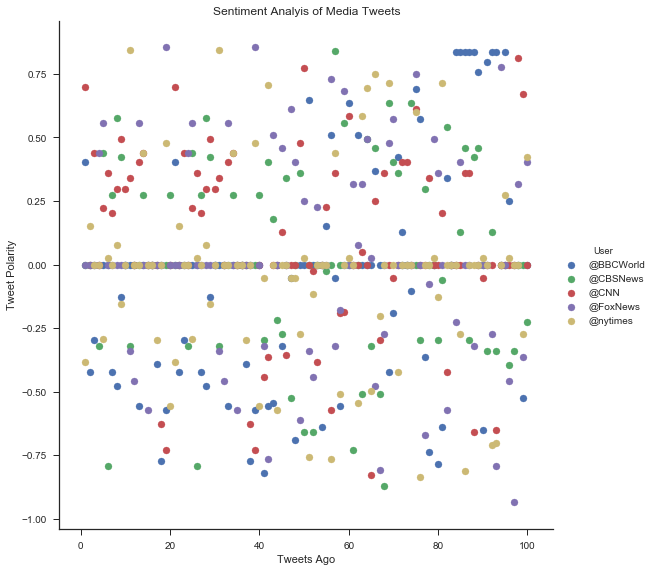

In [86]:
# Create Scatter plot on 100 tweets per User
sns.set(style="ticks")

fg = sns.FacetGrid(data=sentiments_pd, hue="User", size=8)
fg.map(plt.scatter, "Tweets Ago", "Compound").add_legend()
plt.title("Sentiment Analyis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment_Scatter_Plot.png")
plt.show()

In [81]:
# Overall Sentiment
overall = sentiments_pd.groupby("User", as_index=False).mean()
overall

,User,Compound,Negative,Neutral,Positive,Tweets Ago
0,@BBCWorld,-0.024288,0.81190,0.10986,0.07825,50.5
1,@CBSNews,0.015795,0.89505,0.05109,0.05384,50.5
2,@CNN,0.075957,0.89730,0.03599,0.06670,50.5
3,@FoxNews,0.025239,0.86870,0.06539,0.06590,50.5
4,@nytimes,-0.018440,0.88192,0.06205,0.05602,50.5


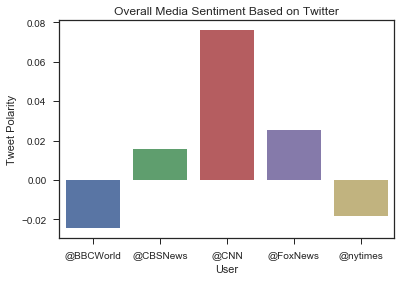

In [87]:
# Create bar plot on overall sentiment per User

fg2 = sns.barplot(x="User", y="Compound", data=overall)
plt.title("Overall Media Sentiment Based on Twitter")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_Sentiment_Bar_Plot.png")
plt.show()